In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

data_url = 'https://ucbe-mastermind.herokuapp.com/data'
response = requests.get(data_url)

data = pd.DataFrame(response.json())

In [4]:
data

,game,guess,guess_number,password,player,record_id,right_digit,right_place
0,1,1234,1,238,player3793,1,0,2
1,1,1256,2,238,player3793,2,0,1
2,1,1738,3,238,player3793,3,0,2
3,1,1039,4,238,player3793,4,1,1
4,1,1794,5,238,player3793,5,0,0
5,1,230,6,238,player3793,6,0,3
6,1,238,7,238,player3793,7,0,4
7,2,1234,1,7201,theBest,8,1,1
8,2,1567,2,7201,theBest,9,2,0
9,2,289,3,7201,theBest,10,1,1


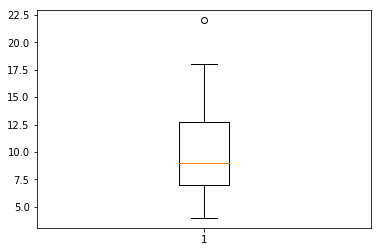

In [2]:
game_summary = data.groupby('game')
plt.boxplot(game_summary['guess'].count())
plt.show()

In [16]:
final_entry = game_summary.last()

In [30]:
final_entry.loc[final_entry['right_place']==4].groupby('player')['guess_number'].min().sort_values()

player
bea            5
theBest        5
AMD            7
Sammy          7
Shirley        7
Tamarind       7
player3793     7
betty          9
JLC           10
lucky         10
KingKang      11
tired         14
A             17
Never Ever    17
Name: guess_number, dtype: int64

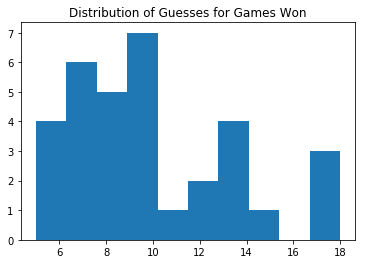

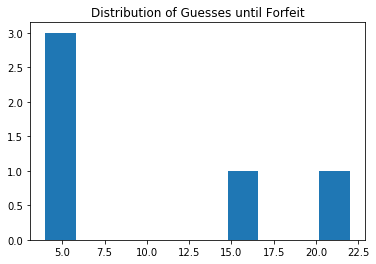

In [22]:
pd.concat([game_summary['guess_number'].max(),game_summary['player'].first()],axis=1).sort_values(['guess_number'])
plt.hist(final_entry.loc[final_entry['right_place']==4]['guess_number'])
plt.title('Distribution of Guesses for Games Won')
plt.show()
plt.hist(final_entry.loc[final_entry['right_place']!=4]['guess_number'])
plt.title('Distribution of Guesses until Forfeit')
plt.show()